<a href="https://colab.research.google.com/github/10erick-cpu/Entregas_TP/blob/main/TP5/TP5_Clustering_Reconocimiento_de_Patrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico V - Clustering: Reconocimiento de Patrones**

### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Ing. Manlio Miguel Massiris


# **Librerias Usadas**

In [25]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import norm


from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

# **Ejercicios**

Elegir uno de entre los siguientes proyectos sugeridos y aplicar
clustering para resolverlo. Cada proyecto tiene datasets de diferentes
características y dificultad (indicada con un semaforito).
Para los más sencillos trabajar individualmente y aplicar más de un método de
clustering, utilizar diferentes parámetros, comparar evaluaciones. Para los más
complejos, trabajar en grupos de dos personas y aplicar un único modelo.
Si encuentran algún otro caso de clústering (que no esté totalmente resuelto) lo
pueden proponer para negociarlo con la catedra.

# **Crímenes violentos en los estados de EEUU**


El dataset contiene registros de crímenes ocurridos durante 1973 en EEUU en diferentes estados, así como el porcentaje de la población que vive en zonas
urbanas en dichos estados. 

El objetivo es agrupar a estos estados en diferentes categorías de acuerdo a estos factores.

**Notebook Asociado** :

https://github.com/manlio99/Materia-deaprendizaje/tree/master/3_MidtermProjects/ProjectUSA



# **Dataset a utilizar - Crímenes violentos en los estados de EEUU**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv", index_col = 0)

df.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
# Renombramos columna 

df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")

df = df.rename(columns={ "Unnamed: 0": "State"})

df1 = df.set_index(df['State']).drop('State', axis=1)

df1

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


#**Parámetros Estadísticos**

In [4]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# **Información del Dataframe**

El método info() nos proporciona información sobre el DataFrame.

Dicha información contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).


In [5]:
inf = df1.info()
inf

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


# **Verificamos si hay valores nulos en el Dataset a analizar**

In [7]:
# La función pandas.isnull devuelve una estructura con las mismas dimensiones que la que se cede como argumento
# sustituyendo cada valor por el booleano 'True' si el correspondiente
# elemento es un valor nulo, y por el booleano 'False' en caso contrario.


# sum() se calcula como True=1 y False=0, puede contar el número de valores faltantes en cada fila y columna llamando a sum() 
# desde el resultado de isnull().


df1.isnull().sum()



Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# **Comentario**

Podemos apreciar que el Dataset analizado no presenta valores faltantes.

# **Estandarización de los Datos**



In [8]:
# Normalizamos el Dataset

df1_scaled = normalize(df1)
df1_norm = pd.DataFrame(df1_scaled, columns = df1.columns)
df1_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


# **Aplicamos Agrupamiento Jerarquico - Hierarchical Clustering**


Hierarchical clustering es una alternativa a los métodos de partitioning clustering que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

**Aglomerativo** **(agglomerative clustering o bottom-up)**: el agrupamiento se inicia con todas las observaciones separadas, cada una formando un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en uno solo.

Como se mencionó anteriormente, el enfoque aglomerante es un enfoque de abajo hacia arriba (bottom-up) en donde inicialmente cada elemento es considerado un cluster, posteriormente se toman los dos puntos más cercanos y se forma un cluster de dos elementos, a partir de ahí se localizan los clusters más cercanos para formar un nuevo cluster y así sucesivamente, hasta que todos los elementos pertenece a un solo cluster. Con ello creamos el dendograma para decidir cuantos cluster tendrá la muestra de datos.

**Divisivo** **(divisive clustering o top-down)**: es la estrategia opuesta al aglomerativo. Se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster* individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma.











# **Aglomerativo**


El algoritmo seguido para por el **clustering aglomerativo** es:

Considerar cada una de las n observaciones como un cluster individual, formando así la base del dendrograma (hojas).

Proceso iterativo hasta que todas las observaciones pertenecen a un único cluster:

1. Calcular la distancia entre cada posible par de los n clusters. El investigador debe determinar el tipo de medida empleada para cuantificar la similitud entre observaciones o grupos (distancia y linkage).

2. Los dos clusters más similares se fusionan, de forma que quedan n-1 clusters.

**Cortar la estructura de árbol generada (dendrograma) a una determinada altura para crear los clusters finales.**


Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como linkage. A continuación, se describen los 5 tipos de **linkage** más empleados y sus definiciones.

**Complete or Maximum**  : se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (maximal intercluster dissimilarity).

**Single or Minimum**: se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (minimal intercluster dissimilarity).

**Average**: Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (mean intercluster dissimilarity).

**Centroid**: Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.

**Ward**: Se trata de un método general. La selección del par de clusters que se combinan en cada paso del agglomerative hierarchical clustering se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El método Ward's minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. Esta es la misma métrica que se minimiza en K-means.

**Los métodos de complete, average y Ward's minimum variance** suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de centroides. Junto con los resultados de un proceso de hierarchical clustering siempre hay que indicar qué distancia se ha empleado, así como el tipo de linkage, ya que, dependiendo de estos, los resultados pueden variar en gran medida.

# **Gráfico - Dendrograma - Número de Clusters**


Realizamos este gráfico para verificar cuántos clústeres debemos elegir. El método utilizado en linkage será 'ward' debido al hecho de que este método tiene un buen comportamiento, es decir genera  dendograma mas compensados (Buen comportamiento contra ruidos).

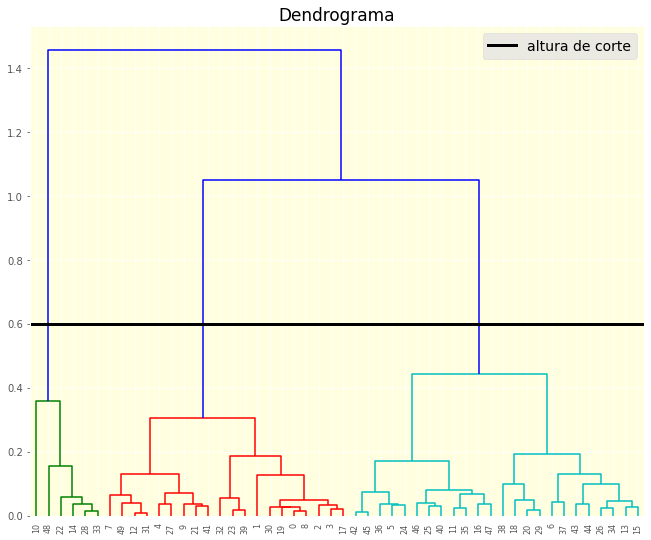

In [48]:
plt.figure(figsize=(11,9))
plt.title('Dendrograma',fontsize=17)
plt.rc('legend',fontsize=14)

# plt.grid()

link = linkage(df1_norm, method='ward', metric='euclidean')

plt.axhline(y=0.6, color='k', linewidth=3, linestyle='solid',label='altura de corte')
dendrogram(link)

ax = plt.gca()
ax.set_facecolor('lightyellow')
ax.legend()
plt.show()


# **Comentario**

Además de representar en un dendrograma la similitud entre observaciones, se tiene que identificar el número de clusters creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de clusters.  

En este caso, si se realiza el corte a la altura de 0.6, se obtienen 3 clusters.
Por lo tanto elegimos 3 Clusters para nuestro analisis.


# **Métodos para la  selección del número k óptimo de Clusters**

Una forma sencilla de estimar el número K óptimo de clusters, es aplicar el algoritmo de K-means para un rango de valores de K e identificar aquel valor a partir del cual la reducción en la suma total de varianza intra-cluster (inertia) deja de ser sustancial. A esta estrategia se la conoce como método del codo o elbow method.

## **Método del codo (Elbow Method) para identificar el número óptimo de clusters**

Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide:


Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, representamos en una gráfica lineal la inercia respecto del número de Clusters. 

En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de Clusters para ese data set.

Aqui podemos apreciar “el codo” y por tanto determinar el número optimo de Clusters para el dataset a analizar. 


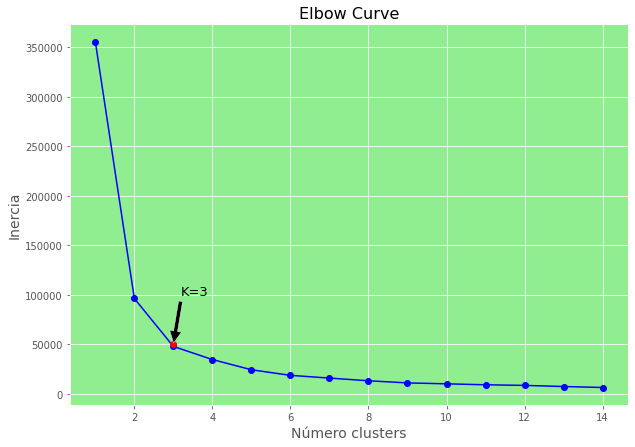

In [10]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 10, 
                        random_state = 123
                    )
    modelo_kmeans.fit(df1)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(range_n_clusters, inertias, marker='o',color='blue')


ax = plt.gca()
ax.set_facecolor('lightgreen')

ax.plot([3], [50000], 'o',color='red')
ax.annotate('K=3', xy=(3,50000), xytext=(3.2, 100000),color='black',fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.03))


ax.set_title("Elbow Curve",fontsize='16')
ax.set_xlabel('Número clusters',fontsize='14')
ax.set_ylabel('Inercia',fontsize='14');

# **Comentario**

Una forma sencilla de estimar el número K óptimo de clusters, es aplicar el algoritmo de K-means para un rango de valores de K e identificar aquel valor a partir del cual la reducción en la suma total de varianza intra-cluster (inertia) deja de ser sustancial. A esta estrategia se la conoce como método del codo o elbow method.


A partir de K = 3 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 3 es una buena opción.

# **Método silhouette para identificar el número óptimo de clusters**

El método de average silhouette considera como número óptimo de clusters aquel que maximiza la media del silhouette coeficient de todas las observaciones.

El silhouette coeficient  (si)  cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

Para cada observación  i , el silhouette coeficient  (si)  se obtiene del siguiente modo:

Calcular el promedio de las distancias (llámese  ai ) entre la observación  i  y el resto de observaciones que pertenecen al mismo cluster. Cuanto menor sea  ai , mejor ha sido la asignación de  i  a su cluster.

Calcular la distancia promedio entre la observación  i  y el resto de clusters. Entendiendo por distancia promedio entre  i  y un determinado cluster  C  como la media de las distancias entre  i  y las observaciones del cluster  C .

Identificar como  bi  a la menor de las distancias promedio entre  i  y el resto de clusters, es decir, la distancia al cluster más próximo (neighbouring cluster).

Calcular el valor de silhouette como:

si= bi−ai / max(ai,bi)
 
Se considera como número óptimo de clusters aquel que maximiza la media del silhouette coeficient de todas las observaciones.

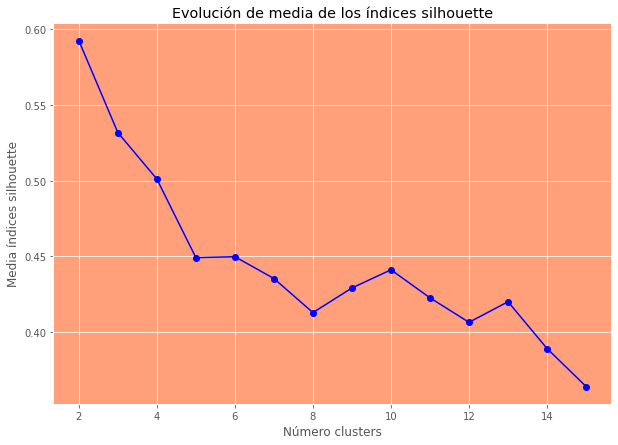

In [178]:

range_n_clusters1 = range(2, 16)
valores_medios_silhouette = []

for n_clusters1 in range_n_clusters1:
    modelo_kmeans1 = KMeans(
                        n_clusters   = n_clusters1, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans1.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(range_n_clusters1, valores_medios_silhouette, marker='o',color='blue')
ax = plt.gca()
ax.set_facecolor('lightsalmon')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');



# **Rango de Valor**


Ahora, obviamente S (i) estará entre [-1, 1] -

**Si el valor de la silueta está cerca de 1**, la muestra está bien agrupada y ya está asignada a un grupo muy apropiado.

**Si el valor de la silueta está cerca de 0**, la muestra podría asignarse a otro grupo más cercano y la muestra se encuentra igualmente lejos de ambos grupos. Eso significa que indica clústeres superpuestos

**Si el valor de silueta está cerca de –1** , la muestra está mal clasificada y simplemente se coloca en algún lugar entre los grupos.

In [30]:
num_of_clusters = range(2, 7)


for n_clusters_ in num_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters_)
    cluster_labels = cluster.fit_predict(df1)
  
# # El silhouette_score da el valor promedio de todas las muestras.

    silhouette_avg = silhouette_score(df1, cluster_labels)
  
    print("k =", n_clusters_,
          " The average silhouette_score is :", silhouette_avg)

k = 2  The average silhouette_score is : 0.592655441935794
k = 3  The average silhouette_score is : 0.5319024108339817
k = 4  The average silhouette_score is : 0.5012332370891494
k = 5  The average silhouette_score is : 0.44929501828815677
k = 6  The average silhouette_score is : 0.4513527003794501


# **Comentario**

El valor medio de los índices silhouette se maximiza con K = 2 clusters. Acorde a este criterio, K = 2 es la mejor opción.

Ambos criterios, Elbow y Silhouette, identifican el valor K=3 y k = 2 respectivamente , como valor óptimo de clusters.

#  **Cluster k = 3 - Etiquetando el Dataset**

In [42]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit_predict(df1_norm)

# Etiquetas del Dataset

df1['Cluster'] = cluster.labels_

# Dataset con la nueva columna Clúster
df1

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


# **Cantidad de estados para cada grupo _ Count()**

In [41]:
df1.groupby('Cluster').count()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,24,24,24,24
1,6,6,6,6
2,20,20,20,20


# **Visualizacion del Dataset  - Grafica de Dispersión**

## **Relación entre Murder y Assalt para cada  Cluster**



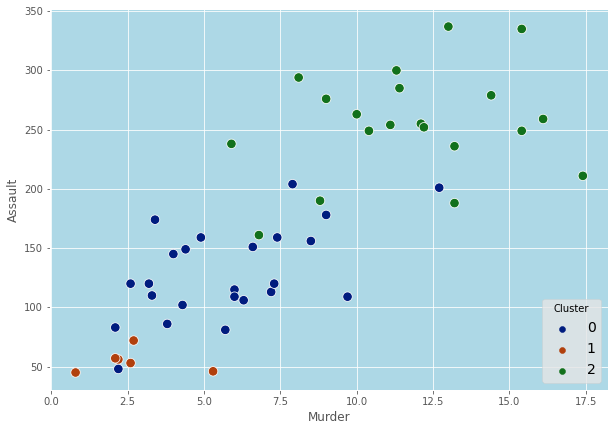

In [136]:
plt.figure(figsize=(10,7))

plt.rc('legend',fontsize=14, loc ='lower right')

ax = plt.gca()
ax.set_facecolor('lightblue')
sns.scatterplot(x=df1['Murder'], y=df1['Assault'],s=90, hue=df1['Cluster'], palette='dark');



# **Comentario**

Si analizamos el grafico, podemos apreciar que el cluster 2, nos indica que los estados dentro de este grupo tienden a tener una gran cantidad de Murder y Assault. 

Por otro lado, el Cluster 1 muestra una cantidad mucho menor de estos delitos (Murder y Assault) .



# **Relación entre UrbanProp y Todos los crimenes**

## **Urbanprop & Murder**

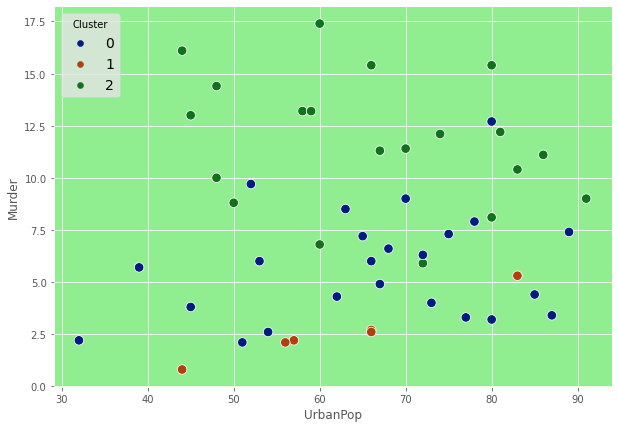

In [139]:
plt.figure(figsize=(10,7))
plt.rc('legend',fontsize=14, loc ='upper left')

ax = plt.gca()
ax.set_facecolor('lightgreen')

sns.scatterplot(x=df1['UrbanPop'], y=df1['Murder'], s=90, hue=df1['Cluster'], palette='dark')

## **Urbanprop & Assault**

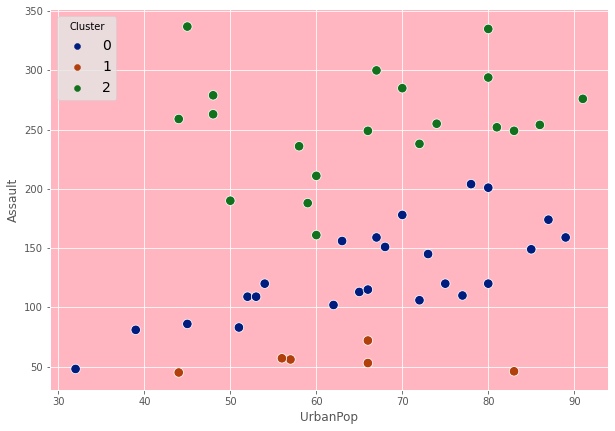

In [146]:
plt.figure(figsize=(10,7))

plt.rc('legend',fontsize=14, loc ='upper left')

ax = plt.gca()
ax.set_facecolor('lightpink')

sns.scatterplot(x=df1['UrbanPop'], y=df1['Assault'],  s=90, hue=df1['Cluster'], palette='dark')

# **Urbanprop & Rape**

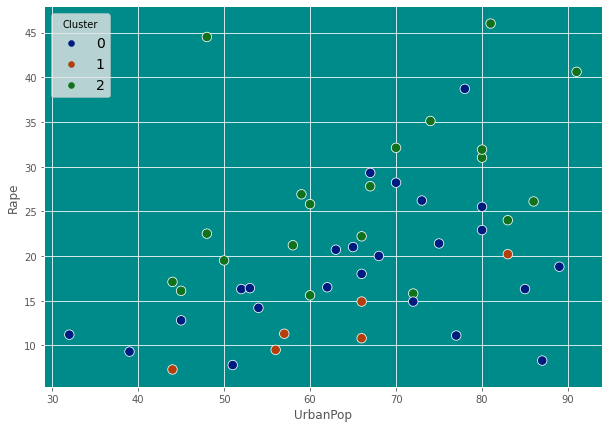

In [175]:
plt.figure(figsize=(10,7))
plt.rc('legend',fontsize=14, loc ='upper left')

ax = plt.gca()
ax.set_facecolor('darkcyan')

sns.scatterplot(x=df1['UrbanPop'], y=df1['Rape'],  s=90, hue=df1['Cluster'], palette='dark')

# **Comentario**

Los gráficos de dispersión son consistentes con el análisis anterior, donde podemos observar ver que el Cluster 2 indica los estados más violentos.

A su vez , el Clúster 1 indica los estados más seguros, y el Clúster 0 no es ni seguro ni violento, en la mayoría de los casos.


# **Análisis de Estados más seguros**

In [179]:
df1[df1['Cluster']==1]

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Hawaii,5.3,46,83,20.2,1
Iowa,2.2,56,57,11.3,1
Minnesota,2.7,72,66,14.9,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
Wisconsin,2.6,53,66,10.8,1


# **Análisis de Estados más peligrosos**





In [180]:
df1[df1['Cluster']==2]

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,2
Illinois,10.4,249,83,24.0,2
